# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

As a data scientist, data plays an important role in day to day basis. Any model with bad data will produce unsatisfactory results. In other cases, there isn't enough data to feed the model. Then, a data scientist needs to search for data, which one of the method is Webscrapping.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so we can see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

What we need is from the website is the date and the corresponding exchange rate. This data is tabulated in a `table` with class `table table-striped table-hover table-hover-solid-row table-simple history-data`. We can input this variable as parameters for `find()`.

In [4]:
table = soup.find(
    'table', 
    attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'}
)
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/27/2020
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-27-2020">
     14,078.12448
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-27-2020">
     USD IDR rate for 11/27/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate


As we can see above, the table contains many rows (`<tr>`). We can extract all of these rows using `find_all()` command with input parameter `'tr'`.

In [5]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr for checking

[<tr><td>11/27/2020</td><td>Friday</td><td><a href="/Rate/USD/IDR/11-27-2020">14,078.12448</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-27-2020">USD IDR rate for 11/27/2020</a></td></tr>,
 <tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>]

Note that each row contains 4 cells:
- 1st cell: date
- 2nd cell: name of day
- 3rd cell: exchange rate
- 4th cell: remarks

Since we are only interested in date and exchange rate, we can extract them by passing index `[0]` for date and `[2]` for exchange rate after `find_all()` command, respectively (recall that python is zero-indexed). We also pass `text` method to convert this data into string.

This data is saved in `temp` object. After a quick peek, we can see that the data starts from the most recent date back to the past. To invert the date, we use `temp[::-1]`.

In [6]:
temp = [] #initiating a tuple

for i in range(len(tr)):
    row = table.find_all('tr')[i]
    
    #get date
    period = row.find_all('td')[0].text
    period = period.strip() #for removing the excess whitespace
    
    #get exchange rate
    ex_rate = row.find_all('td')[2].text
    ex_rate = ex_rate.strip() #for removing the excess whitespace
    
    temp.append((period,ex_rate))
    
temp = temp[::-1]
print(temp[:10])
len(temp)

[('5/31/2020', '14,664.14584 IDR'), ('6/1/2020', '14,586.73900 IDR'), ('6/2/2020', '14,382.27395 IDR'), ('6/3/2020', '14,060.78946 IDR'), ('6/4/2020', '14,113.82802 IDR'), ('6/5/2020', '14,305.96407 IDR'), ('6/7/2020', '13,989.39489 IDR'), ('6/8/2020', '13,867.95377 IDR'), ('6/9/2020', '13,870.75718 IDR'), ('6/10/2020', '13,976.91611 IDR')]


147

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns=['date', 'exchange_rate'])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           147 non-null    object
 1   exchange_rate  147 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB
None


,date,exchange_rate
0,5/31/2020,"14,664.14584 IDR"
1,6/1/2020,"14,586.73900 IDR"
2,6/2/2020,"14,382.27395 IDR"
3,6/3/2020,"14,060.78946 IDR"
4,6/4/2020,"14,113.82802 IDR"


Now it's time for data cleaning:
- The type of `date` is `object`. Convert this to `datetime64`
- Remove `IDR` in `exchange_rate` using `.split(' ')` and take the first object from the resulted list
- Remove comma from the `exchange_rate` decimal representation
- The type of `exchange_rate` is `object`. Convert this to `float`

In [8]:
df['date'] = df['date'].astype('datetime64')
df['exchange_rate'] = df['exchange_rate'].apply(lambda x : x.split(' ')[0])
df['exchange_rate'] = df['exchange_rate'].str.replace(',', '')
df['exchange_rate'] = df['exchange_rate'].astype(float)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           147 non-null    datetime64[ns]
 1   exchange_rate  147 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB
None


,date,exchange_rate
0,2020-05-31,14664.14584
1,2020-06-01,14586.73900
2,2020-06-02,14382.27395
3,2020-06-03,14060.78946
4,2020-06-04,14113.82802


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can start with making the data visualization. 

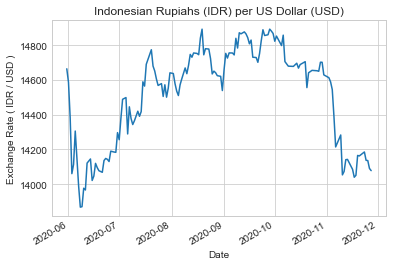

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
df.set_index('date').plot()
plt.legend().remove()
plt.title('Indonesian Rupiahs (IDR) per US Dollar (USD)')
plt.ylabel('Exchange Rate ( IDR / USD )')
plt.xlabel('Date')
plt.show()

After a relatively big drop at the end of May 2020, the IDR to USD exchange rate has been fluctuative. Starting at the beginning of June 2020, the rate has an increasing trend for the whole Q3 period. In September, the rate was relatively stable at 14800 IDR/USD, then decreased to 14100 IDR/USD until this day.

In [10]:
min_rate = df['exchange_rate'].min()
avg_rate = df['exchange_rate'].mean()
max_rate = df['exchange_rate'].max()
print(f"Min Rate: IDR {min_rate.round(2)} on {df.loc[df['exchange_rate'] == min_rate, 'date'].astype(str).values}")
print(f"Min Rate: IDR {avg_rate.round(2)}")
print(f"Min Rate: IDR {max_rate.round(2)} on {df.loc[df['exchange_rate'] == max_rate, 'date'].astype(str).values}")

Min Rate: IDR 13867.95 on ['2020-06-08']
Min Rate: IDR 14511.37
Min Rate: IDR 14892.32 on ['2020-09-28']


We can also see that the lowest exchange rate occured on June 8th 2020 with 13867.95 IDR/USD and the highest exchange rate occured on September 28th 2020 with 14892.32 IDR/USD. On average, the exchange rate during May 31st 2020 to November 27th 2020 period is 14511.37 IDR/USD.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.